In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from time import time

In [2]:
covid_data = pd.read_csv('COVID_dataset.csv')

In [3]:
# Data_preprocss
# Fill the "Outbreak Related with No"
covid_data['Outbreak_Related'] = covid_data['Outbreak_Related'].fillna('No')

# Drop None
covid_data = covid_data.dropna()
# Drop time
covid_data = covid_data.drop(columns='Accurate_Episode_Date')
covid_data = covid_data.drop(columns='Case_Reported_Date')
covid_data = covid_data.drop(columns='Specimen_Date')
covid_data = covid_data.drop(columns='Test_Reported_Date')
# Convert Location
covid_data["Reporting_PHU_Latitude"] = covid_data["Reporting_PHU_Latitude"]/50
covid_data["Reporting_PHU_Longitude"] = covid_data["Reporting_PHU_Longitude"]/90

In [4]:
# Convert Dataframe
covid_data_age = pd.get_dummies(covid_data["Age_Group"], prefix="Age_Group")
covid_data_gender = pd.get_dummies(covid_data["Client_Gender"], prefix="Client_Gender")
covid_data_case = pd.get_dummies(covid_data["Case_AcquisitionInfo"], prefix="Case_AcquisitionInfo")
covid_data_city = pd.get_dummies(covid_data["Reporting_PHU_City"], prefix="PHU_City")

In [5]:
covid_data_final = pd.concat([covid_data, covid_data_age, covid_data_gender, covid_data_case, covid_data_city], axis=1)
covid_data_final = covid_data_final.drop(['Age_Group', 'Client_Gender', 'Case_AcquisitionInfo', 'Reporting_PHU_City'], axis=1)
covid_data_final['Outbreak_Related'] = covid_data_final['Outbreak_Related'].replace({'Yes':1, 'No':0})
covid_data_final['Outcome1'] = covid_data_final['Outcome1'].replace({'Resolved':0, 'Not Resolved':1, 'Fatal':2})

In [6]:
Y = covid_data_final['Outcome1']
X = covid_data_final.drop(columns='Outcome1')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)


In [27]:
model = tf.keras.Sequential()
model.add(Dense(units=128, activation='relu',input_dim = 56))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))
print(model.summary())
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss=tf.keras.losses.categorical_crossentropy,
             metrics=[tf.keras.metrics.categorical_accuracy])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               7296      
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 99        
Total params: 11,523
Trainable params: 11,523
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
x=time()
history = model.fit(X_train,Y_train,validation_split = 0.2, batch_size=128,epochs = 50)
print('\n# Evaluate on test data')
y=time()
traning_time=y-x
print(f"Traning Time:{traning_time}")
results = model.evaluate(X_test, Y_test, batch_size=128)
print('test loss, test acc:', results)
z=time()
evaluation_time=z-y
print(f"Evaluation Time:{evaluation_time}")

Epoch 1/70
74/74 [==============================] - 0s 3ms/step - loss: 0.7036 - categorical_accuracy: 0.6594 - val_loss: 0.7215 - val_categorical_accuracy: 0.6574
Epoch 2/70
74/74 [==============================] - 0s 3ms/step - loss: 0.6985 - categorical_accuracy: 0.6652 - val_loss: 0.7224 - val_categorical_accuracy: 0.6591
Epoch 3/70
74/74 [==============================] - 0s 3ms/step - loss: 0.7024 - categorical_accuracy: 0.6527 - val_loss: 0.7231 - val_categorical_accuracy: 0.6553
Epoch 4/70
74/74 [==============================] - 0s 3ms/step - loss: 0.6943 - categorical_accuracy: 0.6609 - val_loss: 0.7234 - val_categorical_accuracy: 0.6617
Epoch 5/70
74/74 [==============================] - 0s 4ms/step - loss: 0.6958 - categorical_accuracy: 0.6668 - val_loss: 0.7265 - val_categorical_accuracy: 0.6570
Epoch 6/70
74/74 [==============================] - 0s 2ms/step - loss: 0.6989 - categorical_accuracy: 0.6635 - val_loss: 0.7209 - val_categorical_accuracy: 0.6549
Epoch 7/70
74/74

Epoch 51/70
74/74 [==============================] - 0s 2ms/step - loss: 0.6832 - categorical_accuracy: 0.6708 - val_loss: 0.7400 - val_categorical_accuracy: 0.6625
Epoch 52/70
74/74 [==============================] - 0s 2ms/step - loss: 0.6884 - categorical_accuracy: 0.6549 - val_loss: 0.7317 - val_categorical_accuracy: 0.6583
Epoch 53/70
74/74 [==============================] - 0s 2ms/step - loss: 0.6903 - categorical_accuracy: 0.6564 - val_loss: 0.7409 - val_categorical_accuracy: 0.6472
Epoch 54/70
74/74 [==============================] - 0s 3ms/step - loss: 0.6902 - categorical_accuracy: 0.6608 - val_loss: 0.7423 - val_categorical_accuracy: 0.6480
Epoch 55/70
74/74 [==============================] - 0s 3ms/step - loss: 0.6934 - categorical_accuracy: 0.6630 - val_loss: 0.7427 - val_categorical_accuracy: 0.6613
Epoch 56/70
74/74 [==============================] - 0s 2ms/step - loss: 0.6895 - categorical_accuracy: 0.6619 - val_loss: 0.7418 - val_categorical_accuracy: 0.6506
Epoch 57/7

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


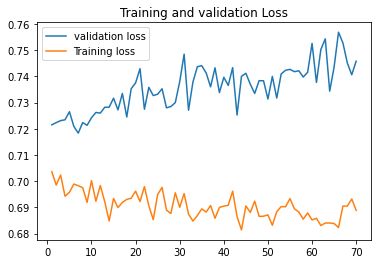

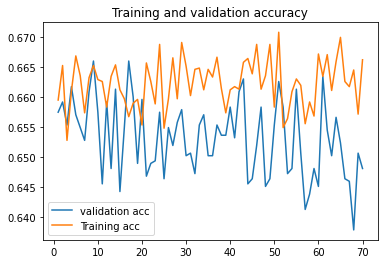

<Figure size 432x288 with 0 Axes>

In [31]:
print(history.history.keys())
acc = history.history['categorical_accuracy']
loss = history.history['loss']
validation_acc = history.history['val_categorical_accuracy']
validation_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot
plt.plot(epochs, validation_loss, label='validation loss')
plt.plot(epochs, loss, label='Training loss')
plt.title('Training and validation Loss')
plt.legend()
plt.figure()

plt.plot(epochs, validation_acc, label='validation acc')
plt.plot(epochs, acc, label='Training acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

In [32]:
# Kaggle Data
# import
covid_data_kaggle = pd.read_csv('COVID_dataset_Kaggle.csv')
covid_data_kaggle['Outbreak_Related'] = covid_data_kaggle['Outbreak_Related'].fillna('No')
covid_data_kaggle = covid_data_kaggle.drop(columns='Accurate_Episode_Date')
covid_data_kaggle = covid_data_kaggle.drop(columns='Case_Reported_Date')
covid_data_kaggle = covid_data_kaggle.drop(columns='Specimen_Date')
covid_data_kaggle = covid_data_kaggle.drop(columns='Test_Reported_Date')


# Convert Location
covid_data_kaggle["Reporting_PHU_Latitude"] = covid_data_kaggle["Reporting_PHU_Latitude"]/50
covid_data_kaggle["Reporting_PHU_Longitude"] = covid_data_kaggle["Reporting_PHU_Longitude"]/90

FileNotFoundError: [Errno 2] File COVID_dataset_Kaggle.csv does not exist: 'COVID_dataset_Kaggle.csv'

In [103]:
# Convert Dataframe
covid_data_age_kaggle = pd.get_dummies(covid_data_kaggle["Age_Group"], prefix="Age_Group")
covid_data_gender_kaggle = pd.get_dummies(covid_data_kaggle["Client_Gender"], prefix="Client_Gender")
covid_data_case_kaggle = pd.get_dummies(covid_data_kaggle["Case_AcquisitionInfo"], prefix="Case_AcquisitionInfo")
covid_data_city_kaggle = pd.get_dummies(covid_data_kaggle["Reporting_PHU_City"], prefix="PHU_City")

# Combine
covid_data_final_kaggle = pd.concat([covid_data_kaggle, covid_data_age_kaggle, covid_data_gender_kaggle, covid_data_case_kaggle, covid_data_city_kaggle], axis=1)
covid_data_final_kaggle = covid_data_final_kaggle.drop(['Age_Group', 'Client_Gender', 'Case_AcquisitionInfo', 'Reporting_PHU_City'], axis=1)
covid_data_final_kaggle['Outbreak_Related'] = covid_data_final_kaggle['Outbreak_Related'].replace({'Yes':1, 'No':0})

In [104]:
# Reindex
dummies_frame = pd.get_dummies(X)
covid_data_final_kaggle = covid_data_final_kaggle.reindex(columns = dummies_frame.columns, fill_value=0)



In [105]:
Y_kaggle = model.predict_classes(covid_data_final_kaggle)
Y_kaggle_Dataframe = pd.DataFrame(Y_kaggle, columns = ['Outcome1'])
Y_kaggle_Dataframe['Outcome1'] = Y_kaggle_Dataframe['Outcome1'].replace({0:'Resolved', 1:'Not Resolved', 2:'Fatal'})
Y_kaggle_Dataframe.to_csv("P1_Kaggle.csv", header=["Outcome1"], index=True)
